In [1]:
from torchvision import datasets

In [2]:
rootdir = r'C:\Users\DeLL\Desktop\ML\pyTorch_youtube\Data'
T = datasets.CIFAR10(rootdir,train=True,download=True)

100.0%

Extracting C:\Users\DeLL\Desktop\ML\pyTorch_youtube\Data\cifar-10-python.tar.gz to C:\Users\DeLL\Desktop\ML\pyTorch_youtube\Data


In [3]:
V = datasets.CIFAR10(rootdir,train=False,download=True)

Files already downloaded and verified


In [4]:
len(T)

50000

In [5]:
len(V)

10000

In [6]:
X,y = T[40]

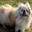

In [7]:
X

In [8]:
T.classes[y]

'dog'

In [9]:
from torchvision import transforms

In [10]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [11]:
to_tensor = transforms.ToTensor()

In [12]:
X_t = to_tensor(X)

In [13]:
type(X_t)

torch.Tensor

In [14]:
X_t.shape

torch.Size([3, 32, 32])

In [16]:
T = datasets.CIFAR10(rootdir,train=True,download=True,
                    transform = transforms.ToTensor())
V = datasets.CIFAR10(rootdir,train=False,download=True,
                    transform = transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [17]:
type(T)

torchvision.datasets.cifar.CIFAR10

In [18]:
T.shape

AttributeError: 'CIFAR10' object has no attribute 'shape'

In [19]:
X_t,y = T[40]

In [20]:
X_t.shape

torch.Size([3, 32, 32])

In [21]:
import torch

In [22]:
tL = torch.utils.data.DataLoader(T,batch_size=64,shuffle=True)

In [23]:
vL = torch.utils.data.DataLoader(V,batch_size=64,shuffle=True) 

In [24]:
import torch.nn as nn

In [25]:
model = nn.Sequential(
    nn.Linear(3072,200),
    nn.ReLU(),
    nn.Linear(200,10),
    nn.LogSoftmax(dim=1)
)

In [26]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [27]:
loss_fn = nn.NLLLoss()

In [29]:
ne = 5
for e in range(ne):
    for X,y in tL:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(float(loss))

1.8271985054016113
1.4406744241714478
1.6483951807022095
1.6231807470321655
1.1682177782058716


In [31]:
c = 0
t = 0
with torch.no_grad():
    for Xv,yv in vL:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size,-1))
        _,p = torch.max(y_hat,dim=1)
        t+=yv.shape[0]
        c += int((p==yv).sum())
        
print(c/t)

0.3901
